In [1]:
#
#
#
#
# K-means. Практика
#
#
#
#

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

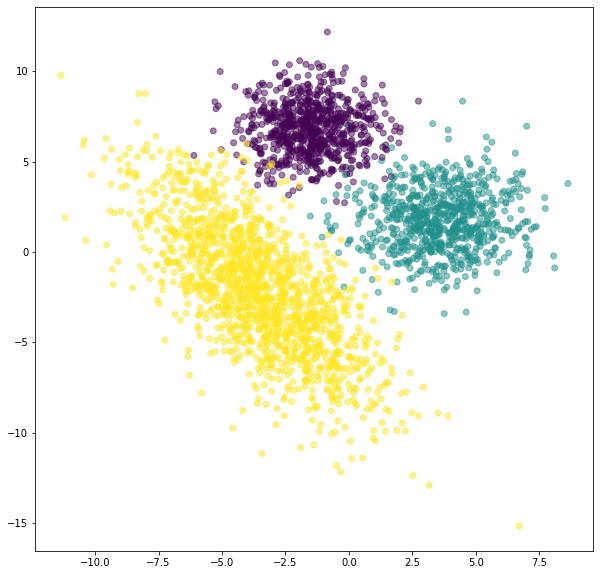

In [80]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [81]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

In [82]:
dataset

(array([[ 4.67143114,  3.93973466],
        [ 1.97552198,  0.05339147],
        [-0.59165564,  7.33623698],
        ...,
        [-0.68379744,  8.14693367],
        [-2.22987289,  8.30988828],
        [-0.71128481,  5.31057565]]), array([1, 1, 0, ..., 0, 0, 0]))

In [83]:
X

array([[ 4.67143114,  3.93973466],
       [ 1.97552198,  0.05339147],
       [-0.59165564,  7.33623698],
       ...,
       [-3.26026403, -1.82053081],
       [-4.50973949, -1.10980335],
       [ 0.29075162, -6.4777484 ]])

In [84]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=42,
                 #init='k-means++', # 'k-means++', 'random', numpy.array
                # max_iter=300
                )
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [85]:
#Обучив, мы можем получить центроиды кластеров:
k_means.cluster_centers_

array([[-3.18996384, -2.90484307],
       [-2.38363475,  6.23391526],
       [ 3.6296089 ,  1.74479425]])

In [86]:
#И узнать, в какой кластер попал каждый из объектов:
k_means.labels_

array([2, 2, 1, ..., 0, 0, 0], dtype=int32)

In [87]:
import numpy as np
a = k_means.cluster_centers_
print(np.round(a).astype(np.int))

[[-3 -3]
 [-2  6]
 [ 4  2]]


In [88]:
#посчитаем сколько объектов в каждом кластере
import numpy as np
a = k_means.labels_
_, counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')

1320 938 742 

In [89]:
X

array([[ 4.67143114,  3.93973466],
       [ 1.97552198,  0.05339147],
       [-0.59165564,  7.33623698],
       ...,
       [-3.26026403, -1.82053081],
       [-4.50973949, -1.10980335],
       [ 0.29075162, -6.4777484 ]])

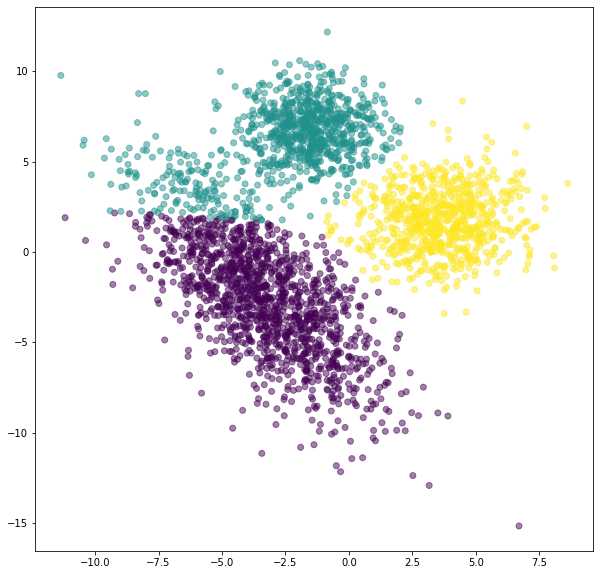

In [90]:
k_means_pred = k_means.labels_

# по сравнению с графиком выше у нас поменялись только цвета!!! с=...
plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()

In [14]:
#
#
#
#
#EM-алгоритм. Практика
#
#
#
#

In [15]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, 
                        random_state=42
                       )

In [16]:
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [17]:
#Получить предсказания можно с помощью метода predict после метода fit:
y_pred = gm.predict(X)

In [18]:
#Обучив, мы можем получить параметры распределений кластеров, например, средние:
means = gm.means_
print(means)

[[ 3.60809518  1.73760829]
 [-1.50915711  6.80752253]
 [-3.54551222 -2.12358327]]


In [19]:
import numpy as np
a = means
print(np.round(a).astype(np.int))

[[ 4  2]
 [-2  7]
 [-4 -2]]


In [20]:
#посчитаем сколько объектов в каждом кластере
import numpy as np
a = y_pred
_, counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')

744 763 1493 

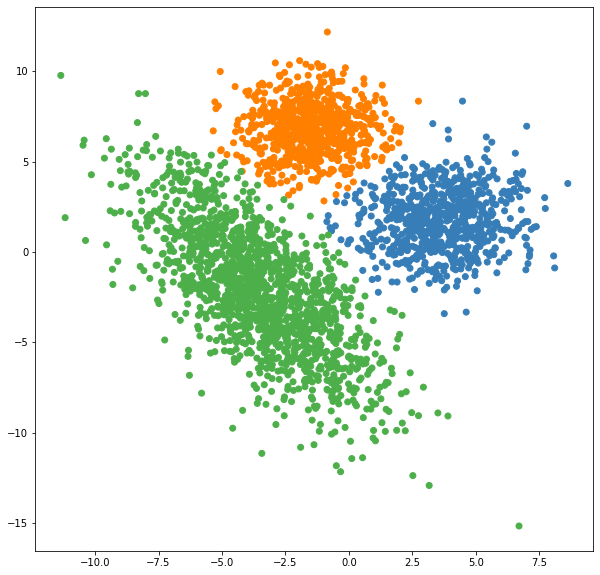

In [23]:
from itertools import cycle, islice
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',]), int(max(y_pred) + 1))))
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
plt.show()

In [24]:
colors

array(['#377eb8', '#ff7f00', '#4daf4a'], dtype='<U7')

In [ ]:
#
#
#
#Агломеративная кластеризация. Практика
#
#
#


In [48]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [49]:
ac.labels_


array([2, 2, 0, ..., 1, 1, 1])

In [50]:
#Обучив, мы можем получить параметры распределений кластеров, например, средние:
a = ac.labels_
len(a)

3000

In [51]:
#посчитаем сколько объектов в каждом кластере
import numpy as np
a = ac.labels_
_, counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')

1112 1142 746 

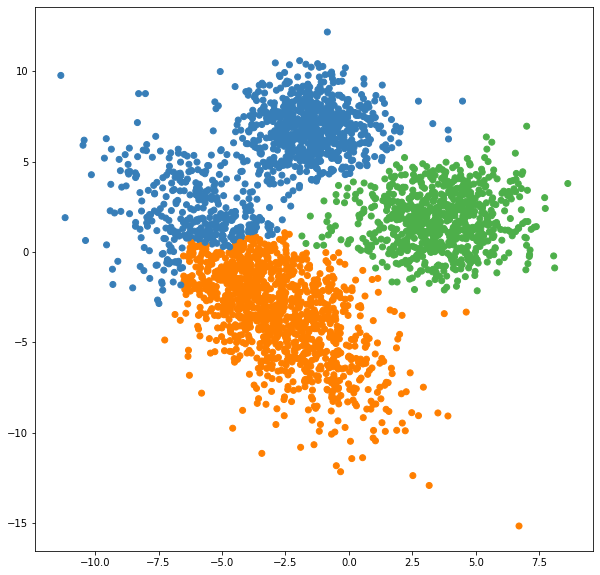

In [52]:
from itertools import cycle, islice
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',]), int(max(a) + 1))))
plt.scatter(X[:, 0], X[:, 1], color=colors[a])
plt.show()

In [53]:
#В переменной connectivity будет хранится матрица смежности для ненаправленного графа на основе датасета.
#При создании модели AgglomerativeClustering можно указать матрицу смежности, передав её в параметр connectivity. Построить матрицу смежности можно с помощью следующего кода:

In [54]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [55]:
ac = AgglomerativeClustering(n_clusters=3,connectivity=connectivity)
ac.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=<3000x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 21754 stored elements in Compressed Sparse Row format>,
                        distance_threshold=None, linkage='ward', memory=None,
                        n_clusters=3, pooling_func='deprecated')

In [56]:
#посчитаем сколько объектов в каждом кластере
import numpy as np
a = ac.labels_
_, counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')

1486 746 768 

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# подготовим данные для построения дендрограммы
# ещё один способ выполнить агломеративную кластеризацию
Z = linkage(X, "ward")

# строим дендрограмму
dendrogram(Z, leaf_rotation=150.)

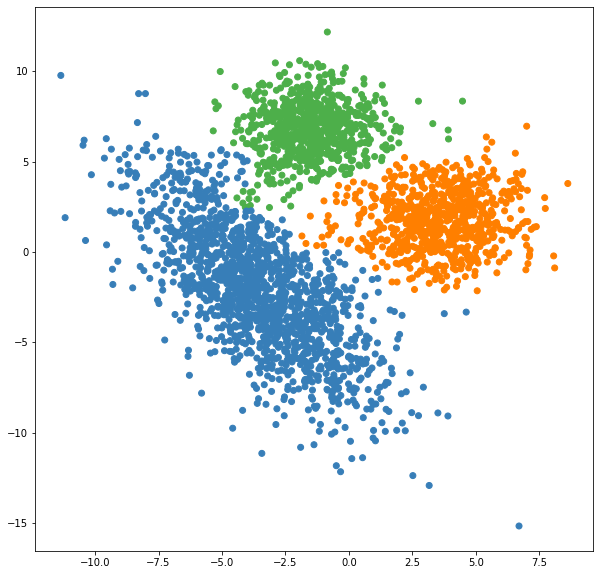

In [57]:
from itertools import cycle, islice
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',]), int(max(a) + 1))))
plt.scatter(X[:, 0], X[:, 1], color=colors[a])
plt.show()

In [ ]:
#
#
#
#DBSCAN. Практика
#
#
#

In [70]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0,8,
                min_samples=35)

In [71]:
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=35, n_jobs=None, p=None)

In [72]:
dbscan.labels_

array([0, 0, 1, ..., 2, 2, 2])

In [73]:
a = dbscan.labels_
_, counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')

583 603 681 1133 

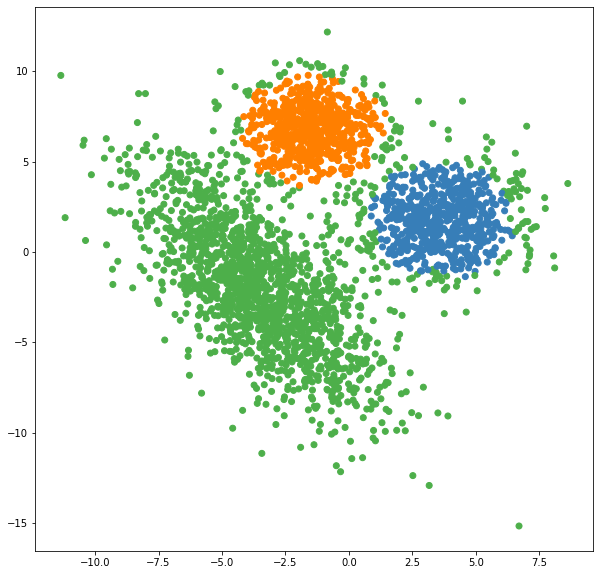

In [76]:
from itertools import cycle, islice
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',]), int(max(a) + 1))))
plt.scatter(X[:, 0], X[:, 1], color=colors[a])
plt.show()

In [ ]:
#
#
#
#Коэффициент силуэта. Практика
#
#
#

In [77]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [92]:
#Kmeans
silhouette_score(X=X, labels=k_means_pred, metric='euclidean')

0.5131209788437305

In [93]:
#EM   GaussianMixture
silhouette_score(X=X, labels=y_pred, metric='euclidean')

0.49893287606943293

In [94]:
#Агломеративная кластеризация
silhouette_score(X=X, labels=ac.labels_, metric='euclidean')

0.4930441244070944

In [95]:
#DBSCAN
silhouette_score(X=X, labels=dbscan.labels_, metric='euclidean')

0.40304933899621376

In [ ]:
#
#
#Однородность. Практика
#
#

In [96]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score

In [98]:
homogeneity_score(labels_true=y, labels_pred=k_means_pred)


0.807281738408743

In [99]:
homogeneity_score(labels_true=y, labels_pred=y_pred)


0.9339791347507893

In [100]:
homogeneity_score(labels_true=y, labels_pred=ac.labels_)


0.90399646106109

In [101]:
homogeneity_score(labels_true=y, labels_pred=dbscan.labels_)

0.8100683580941629

In [ ]:
#
#
#Полнота. Практика
#
#

In [102]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import completeness_score

In [103]:
completeness_score(labels_true=y, labels_pred=k_means_pred)

0.7842373379017128

In [104]:
completeness_score(labels_true=y, labels_pred=y_pred)

0.9325740421656737

In [105]:
completeness_score(labels_true=y, labels_pred=ac.labels_)

0.9012764339220917

In [106]:
completeness_score(labels_true=y, labels_pred=dbscan.labels_)

0.6261137209405894